In [ ]:
#!pip install emoji

In [ ]:
#!pip install contractions

In [ ]:
#!pip install textblob

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from collections import defaultdict

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

import string
import emoji
import re
import contractions
from textblob import TextBlob


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\griffinqin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.options.display.max_colwidth = 200


In [ ]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))

# Read Data

In [ ]:
data = pd.read_csv('./Train.csv')
test = pd.read_csv('./Test.csv')

In [ ]:
data.head()

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #MB #MBS #MMR #STEGMANLIFE @ Stegman St. <url>,0.00,1.00
1,E3303EME,I'm 100% thinking of devoting my career to proving autism isn't caused by vaccines due to the IDIOTIC posts I've seen about World Autism Day,1.00,1.00
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE YOUR CHILD",-1.00,1.00
3,1DR6ROZ4,"I mean if they immunize my kid with something that won't secretly kill him years down the line then I'm all for it, but I don't trust that",-1.00,1.00
4,J77ENIIE,Thanks to <user> Catch me performing at La Nuit NYC 1134 1st ave. Show starts at 6! #jennifair #mmr… <url>,0.00,1.00


# EDA

## Label Distribution

C:\Users\griffinqin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'samples')

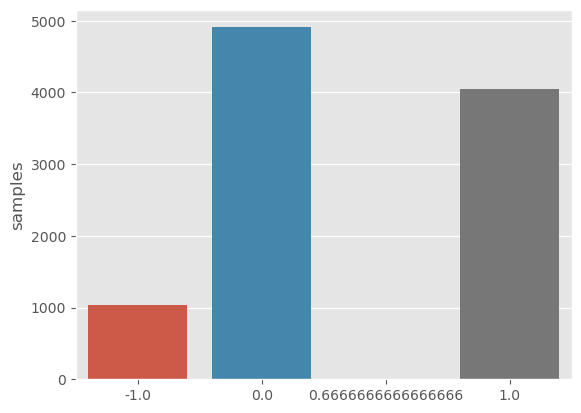

In [ ]:
x=data.label.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

## Number of characters in tweets

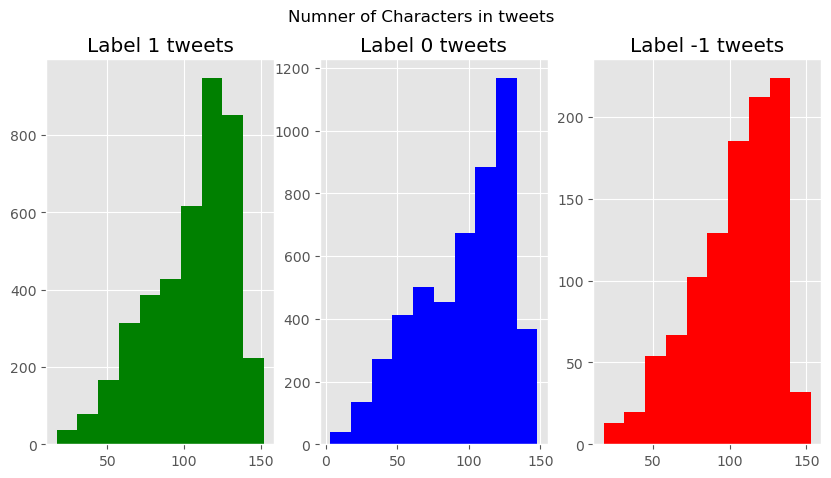

In [ ]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(10,5))

tweet_len=data[data['label']==1]['safe_text'].str.len()
ax1.hist(tweet_len,color='green')
ax1.set_title('Label 1 tweets')

tweet_len=data[data['label']==0]['safe_text'].str.len()
ax2.hist(tweet_len,color='blue')
ax2.set_title('Label 0 tweets')

tweet_len=data[data['label']==-1]['safe_text'].str.len()
ax3.hist(tweet_len,color='red')
ax3.set_title('Label -1 tweets')

fig.suptitle('Numner of Characters in tweets')
plt.show()

## Number of words in a tweet

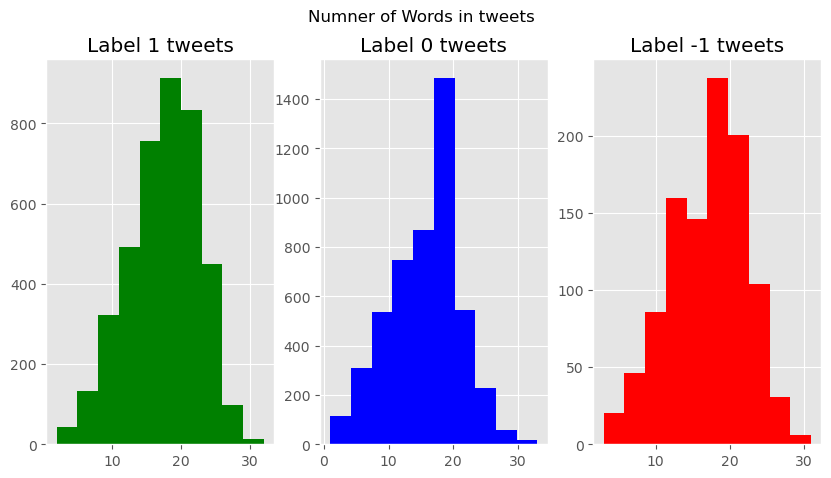

In [ ]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(10,5))

tweet_len=data[data['label']==1]['safe_text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='green')
ax1.set_title('Label 1 tweets')

tweet_len=data[data['label']==0]['safe_text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='blue')
ax2.set_title('Label 0 tweets')

tweet_len=data[data['label']==-1]['safe_text'].str.split().map(lambda x: len(x))
ax3.hist(tweet_len,color='red')
ax3.set_title('Label -1 tweets')

fig.suptitle('Numner of Words in tweets')
plt.show()

## Average word length

C:\Users\griffinqin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\griffinqin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\griffinqin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

Text(0.5, 0.98, 'Average word length in each tweet')

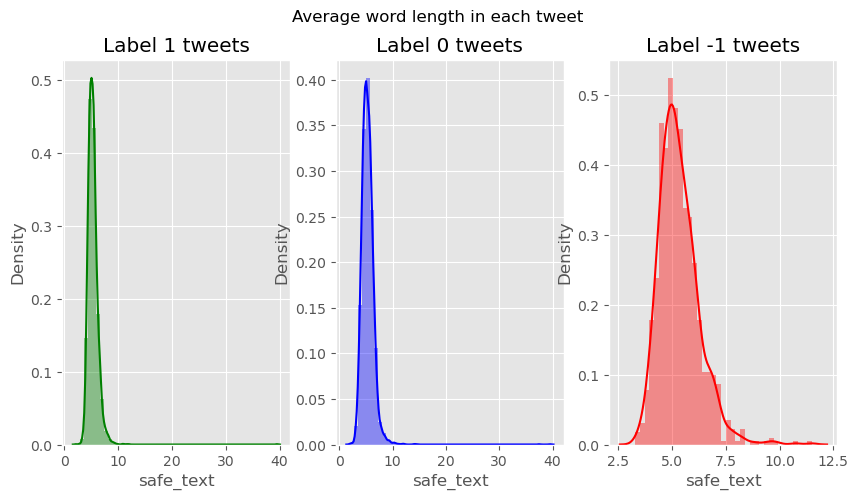

In [ ]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(10,5))

word = data[data['label']==1]['safe_text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='green')
ax1.set_title('Label 1 tweets')

word = data[data['label']==0]['safe_text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='blue')
ax2.set_title('Label 0 tweets')

word = data[data['label']==-1]['safe_text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax3,color='red')
ax3.set_title('Label -1 tweets')

fig.suptitle('Average word length in each tweet')

## Common stopwords

In [ ]:
def create_corpus(label):
    corpus=[]

    for x in data[data['label']==label]['safe_text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

<BarContainer object of 10 artists>

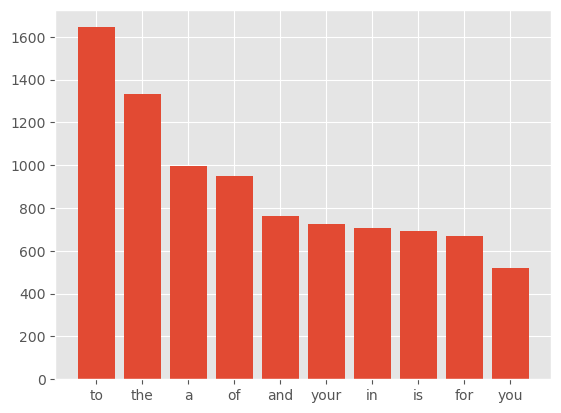

In [ ]:
corpus=create_corpus(1)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
x,y=zip(*top)
plt.bar(x,y)

<BarContainer object of 10 artists>

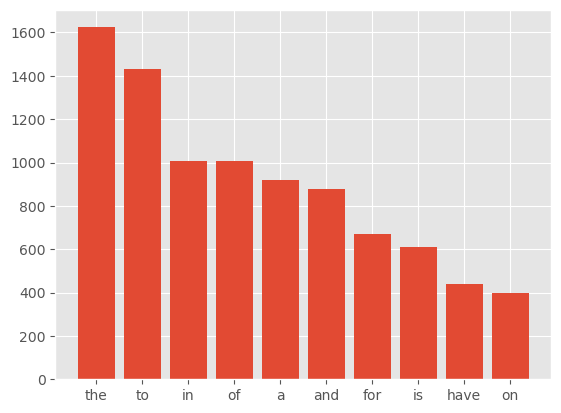

In [ ]:
corpus=create_corpus(0)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
x,y=zip(*top)
plt.bar(x,y)

<BarContainer object of 10 artists>

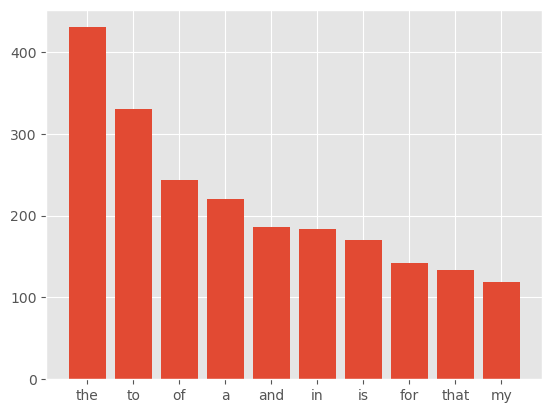

In [ ]:
corpus=create_corpus(-1)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
x,y=zip(*top)
plt.bar(x,y)

## Punctuations

<BarContainer object of 19 artists>

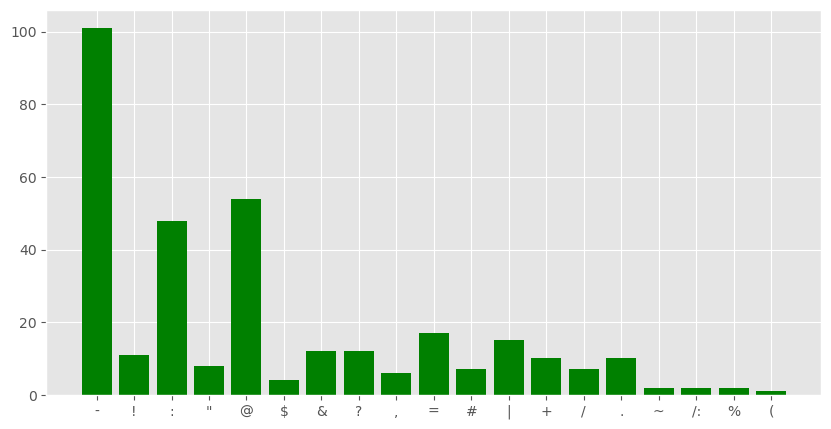

In [ ]:
plt.figure(figsize=(10,5))
corpus=create_corpus(1)

dic=defaultdict(int)

special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

x,y=zip(*dic.items())
plt.bar(x,y,color='green')


<BarContainer object of 20 artists>

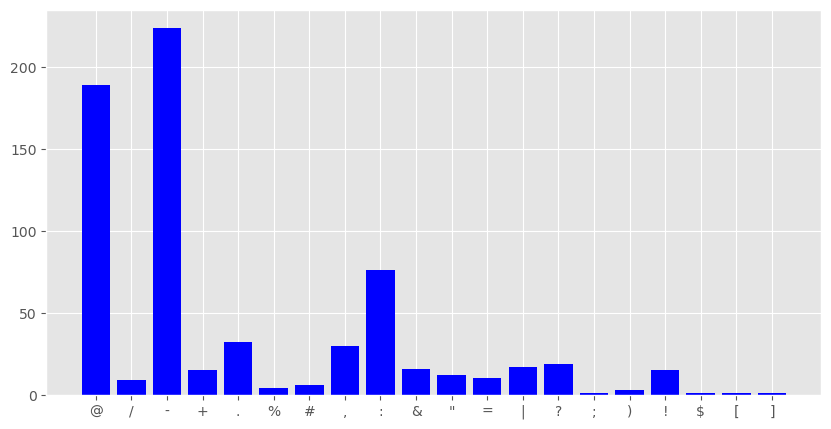

In [ ]:
plt.figure(figsize=(10,5))
corpus=create_corpus(0)

dic=defaultdict(int)

special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

x,y=zip(*dic.items())
plt.bar(x,y,color='blue')

<BarContainer object of 16 artists>

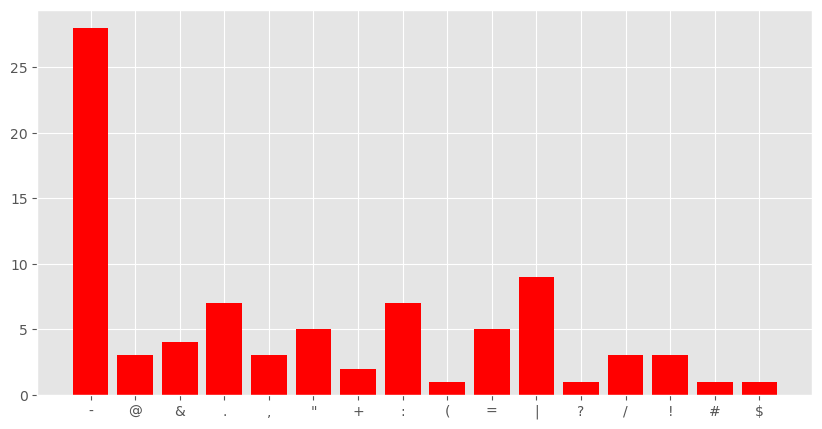

In [ ]:
plt.figure(figsize=(10,5))
corpus=create_corpus(-1)

dic=defaultdict(int)

special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

x,y=zip(*dic.items())
plt.bar(x,y,color='red')

# Data Cleansing

## Train Data Clean

### Check Null Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   10001 non-null  object 
 1   safe_text  10001 non-null  object 
 2   label      10000 non-null  float64
 3   agreement  9999 non-null   float64
dtypes: float64(2), object(2)
memory usage: 312.7+ KB


In [ ]:
data[data['label'].isnull()]

,tweet_id,safe_text,label,agreement
4798,RQMQ0L2A,#lawandorderSVU,NaN,NaN


In [ ]:
data[data['agreement'].isnull()]

,tweet_id,safe_text,label,agreement
4798,RQMQ0L2A,#lawandorderSVU,NaN,NaN
4799,I cannot believe in this day and age some parents could be so oblivious to reality as to not #vaccinate their child.,1,0.67,NaN


### Shift columns to right pos

In [ ]:
data[data['safe_text']=='1']

,tweet_id,safe_text,label,agreement
4799,I cannot believe in this day and age some parents could be so oblivious to reality as to not #vaccinate their child.,1,0.67,NaN


In [ ]:
# Shift column values for Index 4799
idx = (data['safe_text']=='1')
data.loc[idx,['safe_text','label','agreement']] = data.loc[idx,['tweet_id','safe_text','label']].values
data.loc[idx,'tweet_id'] = 'MISSING'
data.loc[idx,'label'] = 1.0

In [ ]:
data[data.index==4799]

,tweet_id,safe_text,label,agreement
4799,MISSING,I cannot believe in this day and age some parents could be so oblivious to reality as to not #vaccinate their child.,1.00,0.67


In [ ]:
data[data.index==9913].safe_text.values

array(["I'm not saying to not give vaccines, I am just saying give them small doses over a long period of time - not one massive dose for a child."],
      dtype=object)

In [ ]:
data = data[data['agreement']>0.5].reset_index(drop=True)

### Conver label values from float to int

In [ ]:
data['label'] = data['label'].apply(int)

## Test Data Clean

### Check Null Data

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5177 entries, 0 to 5176
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   5177 non-null   object
 1   safe_text  5176 non-null   object
dtypes: object(2)
memory usage: 81.0+ KB


In [ ]:
test[test['safe_text'].isnull()]

,tweet_id,safe_text
2024,Dr. JAMES SHANNON,NaN


In [ ]:
test['safe_text'] = test['safe_text'].fillna('nan')

In [ ]:
test[test.index==2024]

,tweet_id,safe_text
2024,Dr. JAMES SHANNON,nan


## Text Clean

In [ ]:
data['ind'] = 'Train'
test['ind'] = 'Test'

In [ ]:
df=pd.concat([data,test]).reset_index(drop=True)
df.shape

(14938, 5)

In [ ]:
#df.to_csv('./df.csv')

In [ ]:
df.head()

,tweet_id,safe_text,label,agreement,ind
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #MB #MBS #MMR #STEGMANLIFE @ Stegman St. <url>,0.00,1.00,Train
1,E3303EME,I'm 100% thinking of devoting my career to proving autism isn't caused by vaccines due to the IDIOTIC posts I've seen about World Autism Day,1.00,1.00,Train
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE YOUR CHILD",-1.00,1.00,Train
3,1DR6ROZ4,"I mean if they immunize my kid with something that won't secretly kill him years down the line then I'm all for it, but I don't trust that",-1.00,1.00,Train
4,J77ENIIE,Thanks to <user> Catch me performing at La Nuit NYC 1134 1st ave. Show starts at 6! #jennifair #mmr… <url>,0.00,1.00,Train


### Lower Case

In [ ]:
df['safe_text_clean'] = df['safe_text'].apply(lambda x: x.lower())

In [ ]:
df.head()

,tweet_id,safe_text,label,agreement,ind,safe_text_clean
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #MB #MBS #MMR #STEGMANLIFE @ Stegman St. <url>,0.00,1.00,Train,me &amp; the big homie meanboy3000 #meanboy #mb #mbs #mmr #stegmanlife @ stegman st. <url>
1,E3303EME,I'm 100% thinking of devoting my career to proving autism isn't caused by vaccines due to the IDIOTIC posts I've seen about World Autism Day,1.00,1.00,Train,i'm 100% thinking of devoting my career to proving autism isn't caused by vaccines due to the idiotic posts i've seen about world autism day
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE YOUR CHILD",-1.00,1.00,Train,"#whatcausesautism vaccines, do not vaccinate your child"
3,1DR6ROZ4,"I mean if they immunize my kid with something that won't secretly kill him years down the line then I'm all for it, but I don't trust that",-1.00,1.00,Train,"i mean if they immunize my kid with something that won't secretly kill him years down the line then i'm all for it, but i don't trust that"
4,J77ENIIE,Thanks to <user> Catch me performing at La Nuit NYC 1134 1st ave. Show starts at 6! #jennifair #mmr… <url>,0.00,1.00,Train,thanks to <user> catch me performing at la nuit nyc 1134 1st ave. show starts at 6! #jennifair #mmr… <url>


### Remove Emoji

In [ ]:
df['emoji_count'] = df['safe_text'].apply(lambda x: emoji.emoji_count(x))

In [ ]:
df[df['emoji_count']>0]

,tweet_id,safe_text,label,agreement,ind,safe_text_clean,emoji_count
8,V6IJATBE,Coughing extra on the shuttle and everyone thinks I have the measles. 😂 #VaccinateYourKids,1.00,0.67,Train,coughing extra on the shuttle and everyone thinks i have the measles. 😂 #vaccinateyourkids,1
69,6Y6VTXM8,Measles in the 717 😳😳😳😳😳😷😷😷,0.00,0.67,Train,measles in the 717 😳😳😳😳😳😷😷😷,8
81,PM6NIT5K,Loving the measles poster making spirit today! ❤️❤️❤️ <url>,0.00,1.00,Train,loving the measles poster making spirit today! ❤️❤️❤️ <url>,3
85,21HVF69Z,What are the odds that the kid with measles uses our lab room??? 😷 <user>,0.00,1.00,Train,what are the odds that the kid with measles uses our lab room??? 😷 <user>,1
102,D8IZHAF6,#NEWSINGLE #smokendrink #manymenrecords 🔥🔥🔥 @ MMR Studios <url>,0.00,1.00,Train,#newsingle #smokendrink #manymenrecords 🔥🔥🔥 @ mmr studios <url>,3
140,WXW9T2ZW,"<user> Immunities, Baby... Immunities 😎",0.00,0.67,Train,"<user> immunities, baby... immunities 😎",1
143,GA1GFO0F,“<user> Gates Foundation pledges $1.55 billion to immunize poor children <url> <user> #wowzers 👍,1.00,0.67,Train,“<user> gates foundation pledges $1.55 billion to immunize poor children <url> <user> #wowzers 👍,1
144,0SAUAMVA,Reading fb comments on measles articles 😂😂 Great entertainment.,0.00,1.00,Train,reading fb comments on measles articles 😂😂 great entertainment.,2
158,KC5WJWE2,Gave this adorable little Asian kid a piece of chalk so he could draw on the chalkboard while waiting for immunizations. He ate it. 😳,0.00,0.67,Train,gave this adorable little asian kid a piece of chalk so he could draw on the chalkboard while waiting for immunizations. he ate it. 😳,1
193,2SDPRLOQ,An aids vaccine was created at Oregon Health &amp; Science University that supposed to completely clear the virus from your system. 👏👏👏👏👏👏👏👏👏,1.00,1.00,Train,an aids vaccine was created at oregon health &amp; science university that supposed to completely clear the virus from your system. 👏👏👏👏👏👏👏👏👏,9


In [ ]:
# Clean Emoji in text
df['safe_text_clean'] = df['safe_text_clean'].apply(lambda x: emoji.replace_emoji(x))

In [ ]:
# Check result
df[df.index==69]

,tweet_id,safe_text,label,agreement,ind,safe_text_clean,emoji_count
69,6Y6VTXM8,Measles in the 717 😳😳😳😳😳😷😷😷,0.00,0.67,Train,measles in the 717,8


In [ ]:
# Check if Emoji still in text
df['emoji_count'] = df['safe_text_clean'].apply(lambda x: emoji.emoji_count(x))
df[df['emoji_count']>0]

,tweet_id,safe_text,label,agreement,ind,safe_text_clean,emoji_count


In [ ]:
df.drop(columns=['emoji_count'], inplace=True)

In [ ]:
df.head()

,tweet_id,safe_text,label,agreement,ind,safe_text_clean
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #MB #MBS #MMR #STEGMANLIFE @ Stegman St. <url>,0.00,1.00,Train,me &amp; the big homie meanboy3000 #meanboy #mb #mbs #mmr #stegmanlife @ stegman st. <url>
1,E3303EME,I'm 100% thinking of devoting my career to proving autism isn't caused by vaccines due to the IDIOTIC posts I've seen about World Autism Day,1.00,1.00,Train,i'm 100% thinking of devoting my career to proving autism isn't caused by vaccines due to the idiotic posts i've seen about world autism day
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE YOUR CHILD",-1.00,1.00,Train,"#whatcausesautism vaccines, do not vaccinate your child"
3,1DR6ROZ4,"I mean if they immunize my kid with something that won't secretly kill him years down the line then I'm all for it, but I don't trust that",-1.00,1.00,Train,"i mean if they immunize my kid with something that won't secretly kill him years down the line then i'm all for it, but i don't trust that"
4,J77ENIIE,Thanks to <user> Catch me performing at La Nuit NYC 1134 1st ave. Show starts at 6! #jennifair #mmr… <url>,0.00,1.00,Train,thanks to <user> catch me performing at la nuit nyc 1134 1st ave. show starts at 6! #jennifair #mmr… <url>


### Remove HTML tags

In [ ]:
# Example
df[df.index==5]

,tweet_id,safe_text,label,agreement,ind,safe_text_clean
5,OVNPOAUX,<user> a nearly 67 year old study when mental health studies and vaccines were relatively in their infancies that has been refuted?,1.00,0.67,Train,<user> a nearly 67 year old study when mental health studies and vaccines were relatively in their infancies that has been refuted?


In [ ]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

In [ ]:
df['safe_text_clean']=df['safe_text_clean'].apply(lambda x : remove_html(x))

In [ ]:
df[df.index==5]

,tweet_id,safe_text,label,agreement,ind,safe_text_clean
5,OVNPOAUX,<user> a nearly 67 year old study when mental health studies and vaccines were relatively in their infancies that has been refuted?,1.00,0.67,Train,a nearly 67 year old study when mental health studies and vaccines were relatively in their infancies that has been refuted?


### Remove punctuations

In [ ]:
# Example - Before
df[df.index==0]

,tweet_id,safe_text,label,agreement,ind,safe_text_clean
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #MB #MBS #MMR #STEGMANLIFE @ Stegman St. <url>,0.00,1.00,Train,me &amp; the big homie meanboy3000 #meanboy #mb #mbs #mmr #stegmanlife @ stegman st.


In [ ]:
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

In [ ]:
df['safe_text_clean'] = df['safe_text_clean'].apply(lambda x : remove_punct(x))

In [ ]:
# Example - After
df[df.index==0]

,tweet_id,safe_text,label,agreement,ind,safe_text_clean
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #MB #MBS #MMR #STEGMANLIFE @ Stegman St. <url>,0.00,1.00,Train,me amp the big homie meanboy3000 meanboy mb mbs mmr stegmanlife stegman st


### Remove Non-ASCI

In [ ]:
# Example - Before
df[df.index.isin([778,1286])]

,tweet_id,safe_text,label,agreement,ind,safe_text_clean
778,LK2Z5KTX,“<user> Why you should care about the measles outbreak–even if you're vaccinated - Fortune <url> #untj4460,0.00,1.00,Train,“ why you should care about the measles outbreak–even if youre vaccinated fortune untj4460
1286,UURPI04T,Just randomly got really angry about parents not vaccinating their children ?¿?,1.00,0.67,Train,just randomly got really angry about parents not vaccinating their children ¿


In [ ]:
def remove_non_ascii(text):
    """
        Remove non-ASCII characters
    """
    return re.sub(r'[^\x00-\x7f]',r'', text)

In [ ]:
df['safe_text_clean'] = df['safe_text_clean'].apply(lambda x : remove_non_ascii(x))

In [ ]:
# Example - After
df[df.index.isin([778,1286])]

,tweet_id,safe_text,label,agreement,ind,safe_text_clean
778,LK2Z5KTX,“<user> Why you should care about the measles outbreak–even if you're vaccinated - Fortune <url> #untj4460,0.00,1.00,Train,why you should care about the measles outbreakeven if youre vaccinated fortune untj4460
1286,UURPI04T,Just randomly got really angry about parents not vaccinating their children ?¿?,1.00,0.67,Train,just randomly got really angry about parents not vaccinating their children


### Expand the Contractions

In [ ]:
# Example - Before
df[df.index.isin([53,60,10672])]

,tweet_id,safe_text,label,agreement,ind,safe_text_clean
53,25MG3GQ6,"They said I wasn't gone be shit, lol looked like I proved them wrong #RRR #MMR #SRT10MG We Here Baby !!!… <url>",0.00,1.00,Train,they said i wasnt gone be shit lol looked like i proved them wrong rrr mmr srt10mg we here baby
60,O44VVHXC,I don't think I will ever understand people's reasons for not getting vaccinated and not vaccinating their kids. What?!?! Explain?!?!,1.00,0.67,Train,i dont think i will ever understand peoples reasons for not getting vaccinated and not vaccinating their kids what explain
10672,6898063M,<user> I have a child with a developmental delay as well. It's up to ppl like us to make sure these kids are not getting vaccinated,NaN,NaN,Test,i have a child with a developmental delay as well its up to ppl like us to make sure these kids are not getting vaccinated


In [ ]:
df['safe_text_clean'] = df['safe_text_clean'].apply(lambda x : contractions.fix(x))

In [ ]:
# Example - After
df[df.index.isin([53,60,10672])]

,tweet_id,safe_text,label,agreement,ind,safe_text_clean
53,25MG3GQ6,"They said I wasn't gone be shit, lol looked like I proved them wrong #RRR #MMR #SRT10MG We Here Baby !!!… <url>",0.00,1.00,Train,they said i was not gone be shit lol looked like i proved them wrong rrr mmr srt10mg we here baby
60,O44VVHXC,I don't think I will ever understand people's reasons for not getting vaccinated and not vaccinating their kids. What?!?! Explain?!?!,1.00,0.67,Train,i do not think i will ever understand peoples reasons for not getting vaccinated and not vaccinating their kids what explain
10672,6898063M,<user> I have a child with a developmental delay as well. It's up to ppl like us to make sure these kids are not getting vaccinated,NaN,NaN,Test,i have a child with a developmental delay as well its up to people like us to make sure these kids are not getting vaccinated


### Abbreviations

In [ ]:
# Example - Before
df[df.index.isin([6320,6321])]

,tweet_id,safe_text,label,agreement,ind,safe_text_clean
6320,UH3P8RX9,Vaccines only save lives nbd ur kid doesn't need them,1.00,0.67,Train,vaccines only save lives nbd you are kid does not need them
6321,LQVFC4VN,gotta get my MMR &amp; Td shots tomorrow for school 🙈😩,1.00,0.67,Train,got to get my mmr amp td shots tomorrow for school


In [ ]:
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk",
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart",
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    #"pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet",
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously",
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "until",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [ ]:
#abbreviations.update({'mmr': 'vaccine'})

In [ ]:
abbr_pattern = re.compile(r'(?<!\w)(' + '|'.join(re.escape(key) for key in abbreviations.keys()) + r')(?!\w)')

In [ ]:
def clean_abbr(text):
    return abbr_pattern.sub(lambda x: abbreviations[x.group()], text)

In [ ]:
df['safe_text_clean'] = df['safe_text_clean'].apply(lambda x : clean_abbr(x))

In [ ]:
# Example - Before
df[df.index.isin([6320,6321])]

,tweet_id,safe_text,label,agreement,ind,safe_text_clean
6320,UH3P8RX9,Vaccines only save lives nbd ur kid doesn't need them,1.00,0.67,Train,vaccines only save lives not big deal you are kid does not need them
6321,LQVFC4VN,gotta get my MMR &amp; Td shots tomorrow for school 🙈😩,1.00,0.67,Train,got to get my mmr amp td shots tomorrow for school


# Replace \n

In [ ]:
# Example - Before
df[df.index.isin([132,187])]

,tweet_id,safe_text,label,agreement,ind,safe_text_clean
132,4KEP2GOM,I honestly don't believe in immunization. \nNow they passed a new law that starting this year we all need specific shots to get into school.,-1.00,1.00,Train,i honestly do not believe in immunization \nnow they passed a new law that starting this year we all need specific shots to get into school
187,NH3YCR4A,"""MMR Meets Bliss"" \nThurSday AUGUST 20\n#Ladiesfree until 11 \n<user> \n<user> \n#Hot97… <url>",0.00,1.00,Train,mmr meets bliss \nthursday august 20\nladiesfree until 11 \n \n \nhot97


In [ ]:
df['safe_text_clean'] = df['safe_text_clean'].replace('\n','', regex=True)

In [ ]:
# Example - After
df[df.index.isin([132,187])]

,tweet_id,safe_text,label,agreement,ind,safe_text_clean
132,4KEP2GOM,I honestly don't believe in immunization. \nNow they passed a new law that starting this year we all need specific shots to get into school.,-1.00,1.00,Train,i honestly do not believe in immunization now they passed a new law that starting this year we all need specific shots to get into school
187,NH3YCR4A,"""MMR Meets Bliss"" \nThurSday AUGUST 20\n#Ladiesfree until 11 \n<user> \n<user> \n#Hot97… <url>",0.00,1.00,Train,mmr meets bliss thursday august 20ladiesfree until 11 hot97


In [ ]:
#df[df['safe_text'].str.contains('\n',na=False)]

In [ ]:
#df['safe_text_test'] = df['safe_text'].apply(lambda x : )

In [ ]:
#df['Match'] = np.where(df['safe_text_test'] == df['safe_text'],"Y","N")

In [ ]:
#df[df['Match']=='N']

# Save Output

In [ ]:
df.head()

,tweet_id,safe_text,label,agreement,ind,safe_text_clean
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #MB #MBS #MMR #STEGMANLIFE @ Stegman St. <url>,0.00,1.00,Train,me amp the big homie meanboy3000 meanboy mb mbs mmr stegmanlife stegman st
1,E3303EME,I'm 100% thinking of devoting my career to proving autism isn't caused by vaccines due to the IDIOTIC posts I've seen about World Autism Day,1.00,1.00,Train,i am 100 thinking of devoting my career to proving autism is not caused by vaccines due to the idiotic posts i have seen about world autism day
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE YOUR CHILD",-1.00,1.00,Train,whatcausesautism vaccines do not vaccinate your child
3,1DR6ROZ4,"I mean if they immunize my kid with something that won't secretly kill him years down the line then I'm all for it, but I don't trust that",-1.00,1.00,Train,i mean if they immunize my kid with something that will not secretly kill him years down the line then i am all for it but i do not trust that
4,J77ENIIE,Thanks to <user> Catch me performing at La Nuit NYC 1134 1st ave. Show starts at 6! #jennifair #mmr… <url>,0.00,1.00,Train,thanks to catch me performing at la nuit new york city 1134 1st ave show starts at 6 jennifair mmr


In [ ]:
train = df[df['ind']=='Train'].reset_index(drop=True)
test = df[df['ind']=='Test'].reset_index(drop=True)

In [ ]:
train['label'] = train['label'].apply(int)

In [ ]:
clean_all= df.to_csv('./clean_all.csv',index=False)
clean_train = train.to_csv('./clean_train.csv',index=False)
clean_test = test.to_csv('./clean_test.csv',index=False)